# Initialization

In [2]:
import json
import os
from statistics import mean, median
from data_parser import DataParser
%matplotlib inline
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [29]:
IKEA_APP = "annotated-datasets/ikea-app"
IKEA_HOMEKIT = "annotated-datasets/ikea-homekit"
IP_CAM = "annotated-datasets/ipcam"
NORMAL_USER = "annotated-datasets/normal-user"
VOICE_ASSISTANT = "annotated-datasets/voice-assistant"
PROCESS_DATASETS = [IKEA_HOMEKIT]

DATASET: annotated-datasets/ikea-homekit 9
+----------------+------------+------------+---------------------+------------+
|      NAME      |    MIN     |    MAX     |         MEAN        |   MEDIAN   |
+----------------+------------+------------+---------------------+------------+
|      WHT1      |   123.17   |   128.23   |  125.42777777777778 |   125.36   |
|      WHT2      |  0.095293  |   7.0039   |  2.882474777777778  |   2.4544   |
|      WHT3      |  -3.8305   |   1.3764   | -0.8491455555555555 |  -1.1901   |
|      WHT4      |  -1.5812   |   4.9858   |  1.0509266666666668 |   1.0921   |
|    Entropy     |  7.620147  |  7.963985  |  7.860672222222222  |  7.90739   |
| Byte_dist_mean | 123.174403 | 128.230018 |  125.42940311111111 | 125.363597 |
| Byte_dist_std  | 51.909095  | 54.877788  |  53.50875144444444  | 53.364157  |
|    Pkts_in     |     0      |     19     |  4.555555555555555  |     0      |
|    Pkts_out    |     1      |     22     |          6          |     2     

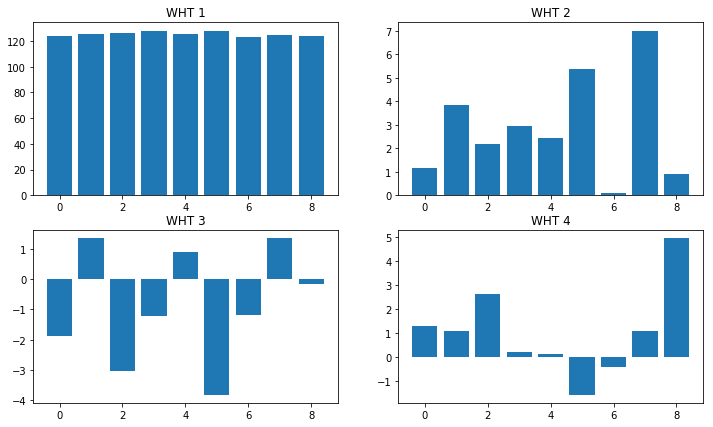

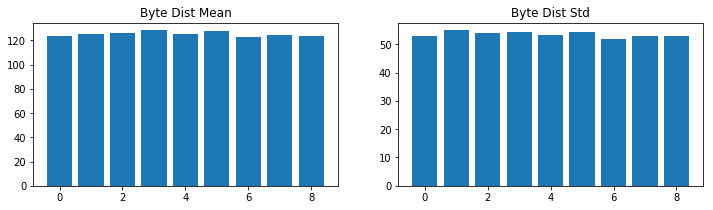

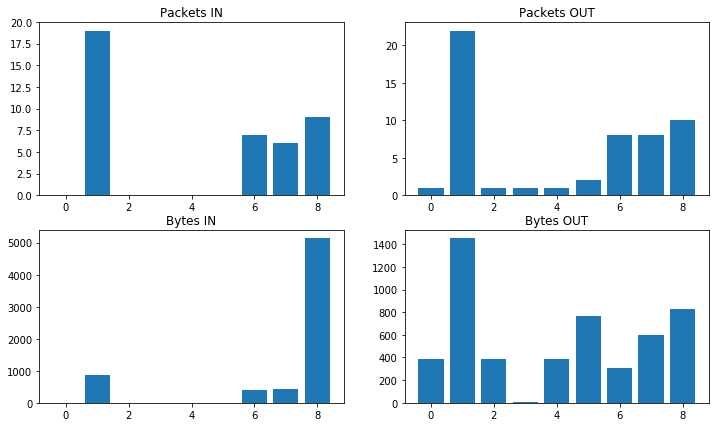

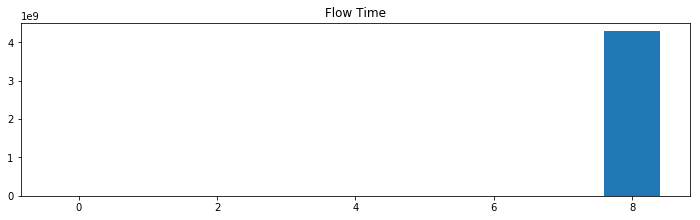

In [32]:
# Scalar Features
wht1 = []
wht2 = []
wht3 = []
wht4 = []
entropy = []
byte_dist_std = []
byte_dist_mean = []
pkts_in = []
pkts_out = []
bytes_in = []
bytes_out = []
flow_time = []
total_len = 0
data = [] 

for dataset in PROCESS_DATASETS:
    for root, dirs, files in os.walk(dataset):
        if dirs:
            continue
        for file in files:
            #Get values from raw flows
            dParse = DataParser(root+"/"+file)
            tmp = dParse.getIndividualFlowMetadata()
            
            with open(root+"/"+file,encoding="utf-8", mode="r") as flows:
                index = 0 
                for flow in flows:
                    flowData = json.loads(flow)
                    if flowData["flow_type"] != "Homekit Data": #Ikea Application Data
                        continue
                    # print("TYPE:",flowData["flow_type"])
                    total_len += 1
                
                    try:
                        # Add wht
                        whtFields = list(flowData["wht"])
                        wht1.append(whtFields[0])
                        wht2.append(whtFields[1])
                        wht3.append(whtFields[2])
                        wht4.append(whtFields[3])
                        #Add byte_dist_std
                        byte_dist_std.append(flowData["byte_dist_std"])
                        #Add byte_dist_mean
                        byte_dist_mean.append(flowData["byte_dist_mean"])
                        #Add entropy
                        entropy.append(flowData["entropy"])
                        #total_entropy -> doesn't make any sense -> reduced value is the same as entropy
                        #Add preprocessed features
                        pkts_in.append(tmp[index][0])
                        pkts_out.append(tmp[index][1])
                        bytes_in.append(tmp[index][2])
                        bytes_out.append(tmp[index][3])
                        flow_time.append(tmp[index][4])
                        index += 1
                    except Exception as e:
                        pass
                    
    print("DATASET:", dataset, total_len)  
    table = PrettyTable()
    table.field_names = ["NAME","MIN", "MAX", "MEAN", "MEDIAN"]
    
    table.add_row(["WHT1",min(wht1),max(wht1),mean(wht1),median(wht1)])
    table.add_row(["WHT2",min(wht2),max(wht2),mean(wht2),median(wht2)])
    table.add_row(["WHT3",min(wht3),max(wht3),mean(wht3),median(wht3)])
    table.add_row(["WHT4",min(wht4),max(wht4),mean(wht4),median(wht4)])
    table.add_row(["Entropy",min(entropy),max(entropy),mean(entropy),median(entropy)])
    table.add_row(["Byte_dist_mean",min(byte_dist_mean),max(byte_dist_mean),mean(byte_dist_mean),median(byte_dist_mean)])
    table.add_row(["Byte_dist_std",min(byte_dist_std),max(byte_dist_std),mean(byte_dist_std),median(byte_dist_std)])
    table.add_row(["Pkts_in",min(pkts_in),max(pkts_in),mean(pkts_in),median(pkts_in)])
    table.add_row(["Pkts_out",min(pkts_out),max(pkts_out),mean(pkts_out),median(pkts_out)])
    table.add_row(["Bytes_in",min(bytes_in),max(bytes_in),mean(bytes_in),median(bytes_in)])
    table.add_row(["Bytes_out",min(bytes_out),max(bytes_out),mean(bytes_out),median(bytes_out)])
    table.add_row(["Flow_time",min(flow_time),max(flow_time),mean(flow_time),median(flow_time)])
    print(table)
    
    #plot data
    fig1 = plt.figure(1, figsize=(12, 7))
    pl11 = fig1.add_subplot(221)
    pl11.bar(range(len(wht1)),wht1)
    pl11.set_title("WHT 1")
    pl12 = fig1.add_subplot(222)
    pl12.bar(range(len(wht2)),wht2)
    pl12.set_title("WHT 2")
    pl13 = fig1.add_subplot(223)
    pl13.bar(range(len(wht3)),wht3)
    pl13.set_title("WHT 3")
    pl14 = fig1.add_subplot(224)
    pl14.bar(range(len(wht4)),wht4)
    pl14.set_title("WHT 4")
    plt.show()
    
    fig2 = plt.figure(2, figsize=(12, 3))
    pl21 = fig2.add_subplot(121)
    pl21.bar(range(len(byte_dist_mean)),byte_dist_mean)
    pl21.set_title("Byte Dist Mean")
    pl22 = fig2.add_subplot(122)
    pl22.bar(range(len(byte_dist_std)),byte_dist_std)
    pl22.set_title("Byte Dist Std")
    plt.show()
    
    fig3 = plt.figure(3, figsize=(12, 7))
    pl31 = fig3.add_subplot(221)
    pl31.bar(range(len(pkts_in)),pkts_in)
    pl31.set_title("Packets IN")
    pl32 = fig3.add_subplot(222)
    pl32.bar(range(len(pkts_out)),pkts_out)
    pl32.set_title("Packets OUT")
    pl33 = fig3.add_subplot(223)
    pl33.bar(range(len(bytes_in)),bytes_in)
    pl33.set_title("Bytes IN")
    pl34 = fig3.add_subplot(224)
    pl34.bar(range(len(bytes_out)),bytes_out)
    pl34.set_title("Bytes OUT")
    plt.show()
    
    fig4 = plt.figure(4, figsize=(12, 7))
    pl41 = fig4.add_subplot(211)
    pl41.bar(range(len(flow_time)),flow_time)
    pl41.set_title("Flow Time")
    pl42 = fig1.add_subplot(212)
    pl42.bar(range(len(entropy)),entropy)
    pl42.set_title("Bytes OUT")
    plt.show()

In [ ]:
# IDP Feature
for dataset in PROCESS_DATASETS:
    for root, dirs, files in os.walk(dataset):
        if dirs:
            continue
        for file in files:
            dParse = DataParser(root+"/"+file)
            with open(root+"/"+file,encoding="utf-8", mode="r") as flows:
                for flow in flows:
                    #if flowData["flow_type"] != "ICMP Port Unreachable": #Ikea Application Data
                    #    continue
                    # print("TYPE:",flowData["flow_type"])
                    
                    try:
                        print("IDP_OUT:",flowData["idp_out"])
                        print("IDP_IN:",flowData["idp_in"])
                    except Exception as e:
                        print("IDP_IN","empty")
                        
                        # count byte dist

In [ ]:
# SPLT Feature
data = [] 
for dataset in PROCESS_DATASETS:
    for root, dirs, files in os.walk(dataset):
        if dirs:
            continue
        for file in files:  
            dParse = DataParser(root+"/"+file)
            tmpBD, tmpBDL = dParse.getByteDistribution()
            tmpIPT = dParse.getIndividualFlowIPTs()
            tmpPL = dParse.getIndividualFlowPacketLengths()
            with open(root+"/"+file,encoding="utf-8", mode="r") as flows:
                for flow in flows:
                    #if flowData["flow_type"] != "ICMP Port Unreachable": #Ikea Application Data
                    #    continue
                    # print("TYPE:",flowData["flow_type"])
                    
                    flowData = json.loads(flow)
                    try:
                    except Exeption as e:
                        pass
                    
                    #vykreslit jednotny histogram pro vsechny hodnoty